##DESCRIPTION##

**Context :**
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.


**Attribute Information:**

1. age

2. sex

3. chest pain type (4 values)

4. resting blood pressure

5. serum cholestoral in mg/dl

6. fasting blood sugar > 120 mg/dl

7. resting electrocardiographic results (values 0,1,2)

8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target value(0 if no , if if yes)

##IMPORTING LIBRARIES AND DATASET##


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.metrics import accuracy_score , confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')
from matplotlib.cm import rainbow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.advanced_activations import LeakyReLU, PReLU
from sklearn.metrics import classification_report
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf

In [ ]:
mycmap = matplotlib.colors.LinearSegmentedColormap.from_list(" " ,["red","yellow","green"])

In [ ]:
data = pd.read_csv("Training.csv")

In [ ]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,0.021951,0.389024,0.043902,0.021951,0.392683,0.023171,0.023171,0.023171,0.046341,0.092683,0.046341,0.092683,0.021951,0.023171,0.114634,0.276829,0.021951,0.091463,0.137805,0.021951,0.045122,0.230488,0.185366,0.115854,0.232927,0.234146,0.024390,0.046341,0.046341,0.209756,...,0.023171,0.023171,0.023171,0.047561,0.096341,0.096341,0.023171,0.047561,0.023171,0.048780,0.021951,0.021951,0.024390,0.024390,0.046341,0.023171,0.024390,0.023171,0.023171,0.024390,0.024390,0.024390,0.024390,0.023171,0.023171,0.023171,0.024390,0.023171,0.024390,0.046341,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,0.146539,0.487578,0.204899,0.146539,0.488397,0.150461,0.150461,0.150461,0.210245,0.290017,0.210245,0.290017,0.146539,0.150461,0.318612,0.447477,0.146539,0.288296,0.344730,0.146539,0.207593,0.421188,0.388634,0.320082,0.422739,0.423507,0.154273,0.210245,0.210245,0.407176,...,0.150461,0.150461,0.150461,0.212857,0.295089,0.295089,0.150461,0.212857,0.150461,0.215431,0.146539,0.146539,0.154273,0.154273,0.210245,0.150461,0.154273,0.150461,0.150461,0.154273,0.154273,0.154273,0.154273,0.150461,0.150461,0.150461,0.154273,0.150461,0.154273,0.210245,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

##Skewness and Kurtosis:##
**Skewness  :**

Skewness refers to distortion or asymmetry in a symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed.

**Kurtosis :**

Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words, kurtosis identifies whether the tails of a given distribution contain extreme values.


In [ ]:
print("Skewness:  \n" , data.skew())
print("Kurtosis: \n " ,data.kurtosis())

Skewness:  
 itching                 2.102180
skin_rash               1.857896
nodal_skin_eruptions    6.527172
continuous_sneezing     4.384192
shivering               6.527172
                          ...   
small_dents_in_nails    6.340830
inflammatory_nails      6.340830
blister                 6.340830
red_sore_around_nose    6.340830
yellow_crust_ooze       6.340830
Length: 132, dtype: float64
Kurtosis: 
  itching                  2.420145
skin_rash                1.452367
nodal_skin_eruptions    40.620488
continuous_sneezing     17.228139
shivering               40.620488
                          ...    
small_dents_in_nails    38.221666
inflammatory_nails      38.221666
blister                 38.221666
red_sore_around_nose    38.221666
yellow_crust_ooze       38.221666
Length: 132, dtype: float64


##CORRELATION MATRIX : ##
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

In [ ]:
data.corr('pearson')

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,-0.059893,-0.057763,0.207896,0.350585,0.069744,-0.061573,-0.061573,-0.061573,-0.088129,0.091830,-0.088129,0.311436,-0.059893,-0.061573,-0.143855,0.037309,-0.059893,-0.126848,-0.159830,-0.059893,-0.086906,-0.067585,0.300936,0.253240,-0.069644,0.230103,-0.063212,-0.088129,-0.088129,0.263282,...,-0.061573,-0.061573,-0.061573,-0.089338,-0.130537,-0.130537,-0.061573,0.226497,-0.061573,-0.090534,0.326439,-0.059893,-0.063212,-0.063212,-0.088129,-0.061573,-0.063212,-0.061573,-0.061573,0.372559,0.372559,-0.063212,-0.063212,-0.061573,-0.061573,-0.061573,-0.063212,-0.061573,-0.063212,-0.088129,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,-0.065324,-0.225046,0.166507,0.298143,-0.105248,-0.067156,-0.067156,-0.067156,-0.096120,-0.139363,-0.096120,0.067246,-0.065324,-0.067156,-0.156900,0.117059,-0.065324,-0.138350,-0.174323,-0.065324,-0.094786,0.053792,-0.207998,-0.157841,-0.090663,0.049731,0.341036,0.204714,-0.096120,-0.224648,...,-0.067156,-0.067156,-0.067156,-0.097439,-0.142374,0.060683,-0.067156,0.481206,-0.067156,-0.098744,0.298143,-0.065324,-0.068944,-0.068944,-0.096120,-0.067156,-0.068944,-0.067156,-0.067156,-0.068944,-0.068944,-0.068944,-0.068944,-0.067156,-0.067156,-0.067156,-0.068944,-0.067156,-0.068944,-0.096120,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,-0.022444,-0.119543,-0.032103,-0.022444,-0.120465,-0.023073,-0.023073,-0.023073,-0.033025,-0.047882,-0.033025,-0.047882,-0.022444,-0.023073,-0.053907,-0.092690,-0.022444,-0.047534,-0.059893,-0.022444,-0.032566,-0.081991,-0.071463,-0.054230,-0.082554,-0.082836,-0.023687,-0.033025,-0.033025,-0.077184,...,-0.023073,-0.023073,-0.023073,-0.033478,-0.048916,-0.048916,-0.023073,-0.033478,-0.023073,-0.033926,0.886395,-0.022444,-0.023687,-0.023687,-0.033025,-0.023073,-0.023687,-0.023073,-0.023073,-0.023687,-0.023687,-0.023687,-0.023687,-0.023073,-0.023073,-0.023073,-0.023687,-0.023073,-0.023687,-0.033025,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,-0.032566,-0.173459,-0.046581,-0.032566,0.041755,-0.033480,-0.033480,-0.033480,-0.047919,-0.069477,-0.047919,-0.069477,-0.032566,-0.033480,0.253730,0.101860,-0.032566,-0.068972,-0.086906,-0.032566,-0.047254,0.132137,-0.103694,-0.078689,-0.119787,-0.120196,-0.034371

##Plotting: 

##PREPROCESSING

Scaling the values:

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale_cols = ['trestbps','chol','thalach', 'oldpeak']

In [ ]:
sc = StandardScaler()
data[scale_cols] = sc.fit_transform(data[scale_cols])

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,3,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,1,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,1,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,3,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,3,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


Checking if there are any NaN values



In [ ]:
data.isnull().values.any()

False

##Splitting the dataset for Training and Validation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#x = data.iloc[:,:-1].values
x = data.drop(['chol','fbs','target'],axis=1)
y = data['target'].values

In [ ]:
train_x , test_x , train_y , test_y = train_test_split(x , y , random_state=5 , test_size = 0.18 )

In [ ]:
print("training dataset : " , train_x.shape)
print("testing dataset : " , test_x.shape)

training dataset :  (248, 11)
testing dataset :  (55, 11)


##Machine Learning Classification Models : 

Classification is a type of supervised learning. It specifies the class to which data elements belong to and is best used when the output has finite and discrete values. It predicts a class for an input variable as well.

There are 2 types of Classification: 

* Binary
* Multi-Class

In this dataset , we have to do Binary Classification.

**Types of Classification Algorithms**

1. Linear Models
* Logistic Regression
* Support Vector Machines
2. Nonlinear models
* K-nearest Neighbors (KNN)
* Kernel Support Vector Machines (SVM)
* Naïve Bayes
* Decision Tree Classification
* Random Forest Classification
* XGBoost Classification

We will be using all the classification methods on this dataset

In [ ]:
acc_model = {}

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
pred = lgr.fit(train_x,train_y).predict(test_x)
acc = accuracy_score(test_y,pred)
acc_train = accuracy_score(lgr.predict(train_x),train_y)
print("Accuracy on Train dataset: " , acc_train)
print("Accuracy on Test dataset: " , acc)
acc_model['Logistic Regression'] = acc

Accuracy on Train dataset:  0.8387096774193549
Accuracy on Test dataset:  0.9272727272727272


Support Vector Machines(Linear)

In [ ]:
from sklearn.svm import SVC
svm_lin = SVC(kernel = 'linear',C = 0.025,random_state=42)
pred = svm_lin.fit(train_x,train_y).predict(test_x)
acc = accuracy_score(test_y,pred)
acc_train = accuracy_score(svm_lin.predict(train_x),train_y)
print("Accuracy on Train dataset: " , acc_train)
print("Accuracy on Test dataset: " , acc)
acc_model['Support Vector Machines(Linear)'] = acc

Accuracy on Train dataset:  0.8306451612903226
Accuracy on Test dataset:  0.9272727272727272


K-nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
nearest_neighbor_score_test = {}
for i in range(1,20):
  knn = KNeighborsClassifier(n_neighbors = i,weights = 'uniform',algorithm = 'kd_tree',leaf_size = 30)
  pred = knn.fit(train_x,train_y).predict(test_x)
  nearest_neighbor_score_test[i] = accuracy_score(test_y,pred)

In [ ]:
max_key_test = max(nearest_neighbor_score_test, key=nearest_neighbor_score_test.get)
print(max_key_test)

3


In [ ]:
knn = KNeighborsClassifier(n_neighbors = max_key_test,algorithm='kd_tree',leaf_size = 30)
pred = knn.fit(train_x,train_y).predict(test_x)
acc = accuracy_score(test_y,pred)
acc_train = accuracy_score(knn.predict(train_x),train_y)
print("Accuracy on Train dataset: " , acc_train)
print("Accuracy on Test dataset: " , acc)
acc_model['K-nearest Neighbors (KNN)'] = acc

Accuracy on Train dataset:  0.8790322580645161
Accuracy on Test dataset:  0.9454545454545454


[[26  1]
 [ 2 26]]


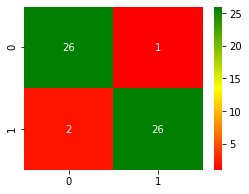

In [ ]:
cm = confusion_matrix(test_y,pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, cmap=mycmap,annot=True)# font size
print(cm)

In [ ]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        27
           1       0.96      0.93      0.95        28

    accuracy                           0.95        55
   macro avg       0.95      0.95      0.95        55
weighted avg       0.95      0.95      0.95        55



Kernel - RBF Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC
svm_rbf = SVC(kernel = 'rbf',random_state=42)
pred = svm_rbf.fit(train_x,train_y).predict(test_x)
acc = accuracy_score(test_y,pred)
acc_train = accuracy_score(svm_rbf.predict(train_x),train_y)
print("Accuracy on Train dataset: " , acc_train)
print("Accuracy on Test dataset: " , acc)
acc_model['Kernel - RBF Support Vector Machines (SVM)'] = acc

Accuracy on Train dataset:  0.875
Accuracy on Test dataset:  0.9272727272727272


Kernel - Sigmoid Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC
svm_s = SVC(kernel = 'sigmoid',random_state=42)
pred = svm_s.fit(train_x,train_y).predict(test_x)
acc = accuracy_score(test_y,pred)
acc_train = accuracy_score(svm_s.predict(train_x),train_y)
print("Accuracy on Train dataset: " , acc_train)
print("Accuracy on Test dataset: " , acc)
acc_model['Kernel - Sigmoid Support Vector Machines (SVM)'] = acc

Accuracy on Train dataset:  0.7701612903225806
Accuracy on Test dataset:  0.8


Kernel - Poly Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC
svm_p= SVC(kernel = 'poly',C = 0.025,random_state=42)
pred = svm_p.fit(train_x,train_y).predict(test_x)
acc = accuracy_score(test_y,pred)
acc_train = accuracy_score(svm_s.predict(train_x),train_y)
print("Accuracy on Train dataset: " , acc_train)
print("Accuracy on Test dataset: " , acc)
acc_model['Kernel - Poly Support Vector Machines (SVM)'] = acc

Accuracy on Train dataset:  0.7701612903225806
Accuracy on Test dataset:  0.9272727272727272


Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
pred = nb.fit(train_x,train_y).predict(test_x)
acc = accuracy_score(test_y,pred)
acc_train = accuracy_score(nb.predict(train_x),train_y)
print("Accuracy on Train dataset: " , acc_train)
print("Accuracy on Test dataset: " , acc)
acc_model['Naive Bayes'] = acc

Accuracy on Train dataset:  0.8306451612903226
Accuracy on Test dataset:  0.8727272727272727


Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
score = {}
for i in range(1,12):
  dtree = DecisionTreeClassifier(max_features= i)
  pred = dtree.fit(train_x,train_y).predict(test_x)
  score[i] = accuracy_score(test_y,pred)

3


<BarContainer object of 11 artists>

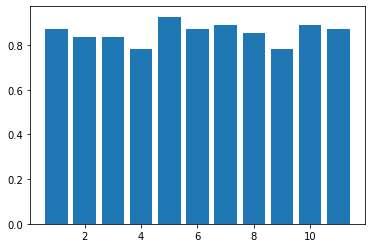

In [ ]:
max_key_test_dtree = max(score, key=score.get)
print(max_key_test)
keys = score.keys()
values = score.values()
plt.bar(keys, values)

In [ ]:
dtree = DecisionTreeClassifier(max_features= max_key_test_dtree)
pred = dtree.fit(train_x,train_y).predict(test_x)
acc = accuracy_score(test_y,pred)
acc_train = accuracy_score(dtree.predict(train_x),train_y)
print("Accuracy on Train dataset: " , acc_train)
print("Accuracy on Test dataset: " , acc)
acc_model['Decision Tree Classifier'] = acc

Accuracy on Train dataset:  1.0
Accuracy on Test dataset:  0.8181818181818182


Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100 , random_state=42)
pred = rf.fit(train_x,train_y).predict(test_x)
acc = accuracy_score(test_y,pred)
acc_train = accuracy_score(rf.predict(train_x),train_y)
print("Accuracy on Train dataset: " , acc_train)
print("Accuracy on Test dataset: " , acc)
acc_model['Random Forest Classifier'] = acc

Accuracy on Train dataset:  1.0
Accuracy on Test dataset:  0.9272727272727272


XGBoost Classification

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
pred = model.fit(train_x,train_y).predict(test_x)
acc = accuracy_score(test_y,pred)
acc_train = accuracy_score(model.predict(train_x),train_y)
print("Accuracy on Train dataset: " , acc_train)
print("Accuracy on Test dataset: " , acc)
acc_model['XGBoost Classifier'] = acc

Accuracy on Train dataset:  0.9596774193548387
Accuracy on Test dataset:  0.9272727272727272


##Artificial Neural Network Approach

In [ ]:
#Initialising the ANN
clr = Sequential()
# Adding the input layer and the first hidden layer
clr.add(Dense(13, kernel_initializer='uniform',activation='relu',input_shape=(11,)))
#clr.add(LeakyReLU(alpha=.01))   # add an advanced activation
          
# Adding the hidden layers
clr.add(Dense(10, kernel_initializer='uniform',activation='relu'))
clr.add(Dense(5, kernel_initializer='uniform',activation='relu'))
clr.add(Dense(3, kernel_initializer='uniform',activation='relu'))

#Adding the output layer
clr.add(Dense(1, kernel_initializer='uniform',activation='relu'))
          
#Compiling the ANN
clr.compile(optimizer = 'adam' , loss = 'binary_crossentropy' ,metrics = ['accuracy'])
clr.fit(train_x , train_y , batch_size =32, epochs = 150)
          
#Predicting the Test set results
pred = clr.predict(test_x)  
pred = pred>0.5
acc = accuracy_score(test_y,pred) 
acc_train = accuracy_score(model.predict(train_x)>0.5,train_y)
print("Accuracy on Train dataset: " , acc_train)
print("Accuracy on Test dataset: " , acc)
acc_model['Neural Networks'] = acc

Epoch 1/150
248/248 [==============================] - 0s 568us/step - loss: 3.9222 - accuracy: 0.4476
Epoch 2/150
248/248 [==============================] - 0s 107us/step - loss: 3.0314 - accuracy: 0.4476
Epoch 3/150
248/248 [==============================] - 0s 111us/step - loss: 2.9177 - accuracy: 0.4476
Epoch 4/150
248/248 [==============================] - 0s 108us/step - loss: 2.8693 - accuracy: 0.4476
Epoch 5/150
248/248 [==============================] - 0s 110us/step - loss: 2.8452 - accuracy: 0.4476
Epoch 6/150
248/248 [==============================] - 0s 105us/step - loss: 2.8308 - accuracy: 0.4476
Epoch 7/150
248/248 [==============================] - 0s 107us/step - loss: 2.8204 - accuracy: 0.4476
Epoch 8/150
248/248 [==============================] - 0s 103us/step - loss: 2.8105 - accuracy: 0.4476
Epoch 9/150
248/248 [==============================] - 0s 110us/step - loss: 2.7985 - accuracy: 0.4476
Epoch 10/150
248/248 [==============================] - 0s 105us/step - l

##Comparing the models :


The Best accuracy is of the model K-nearest Neighbors (KNN) : 0.9454545454545454


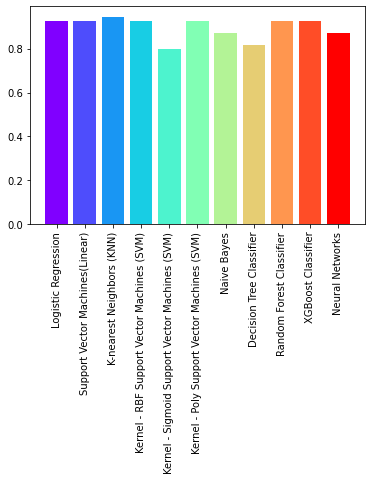

In [ ]:
keys = acc_model.keys()
values = acc_model.values()
colors = rainbow(np.linspace(0, 1, len(acc_model)))
plt.bar(keys, values,color = colors)
plt.xticks(rotation = 90)
max_acc= max(acc_model, key=acc_model.get)
print("The Best accuracy is of the model {} : {}" .format(max_acc,acc_model[max_acc]))

In [ ]:
print(acc_model)

{'Logistic Regression': 0.9272727272727272, 'Support Vector Machines(Linear)': 0.9272727272727272, 'K-nearest Neighbors (KNN)': 0.9454545454545454, 'Kernel - RBF Support Vector Machines (SVM)': 0.9272727272727272, 'Kernel - Sigmoid Support Vector Machines (SVM)': 0.8, 'Kernel - Poly Support Vector Machines (SVM)': 0.9272727272727272, 'Naive Bayes': 0.8727272727272727, 'Decision Tree Classifier': 0.8181818181818182, 'Random Forest Classifier': 0.9272727272727272, 'XGBoost Classifier': 0.9272727272727272, 'Neural Networks': 0.8727272727272727}
